In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from scipy.stats import pearsonr

# Загрузка датасета

In [198]:
df = pd.read_csv('df.csv', index_col=0)

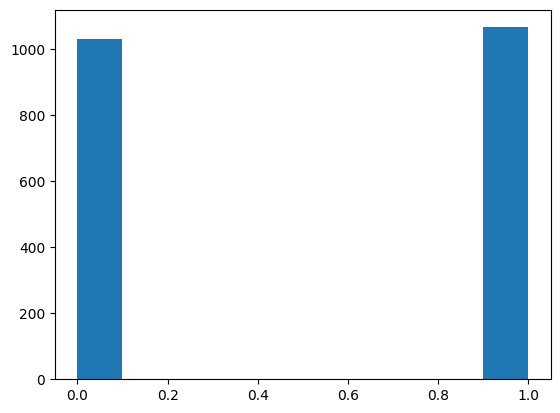

In [209]:
y = df.loc[df['male'] == 0]
plt.hist(y['public'])
plt.show()

In [220]:
df.loc[(df['age'] <= 30) & (df['public'] == 0) & (df['urban'] == 0), 'lnwage'].mean(), df.loc[(df['age'] >= 50) & (df['public'] == 0) & (df['urban'] == 0), 'lnwage'].mean()

(9.682241844444446, 9.452904024691358)

In [ ]:
df.loc[(df['age'] < 30) & (df['public'] == 0) & (df['urban'] == 0), 'lnwage']

In [219]:
df.loc[(df['male'] == 1) & (df['public'] == 1), 'lnwage'].mean(), df.loc[(df['male'] == 0) & (df['public'] == 0), 'lnwage'].mean()

(9.909013021505377, 9.705584141472867)

In [242]:

df.loc[df['age'] <= 25]

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id67,id68,id69,id70,id71,id72,id73,id74,id75,hugeid
18,466,Краснодар: К,Областной це,23,0,ОБРАЗОВАНИЕ,9.155651,1,1,0,...,0,0,0,1,0,0,0,1,0,id44
35,824,Соликамск и,Город,22,1,ХИМИЧЕСКАЯ П,9.935810,1,1,0,...,0,0,0,0,0,0,0,0,0,
52,1230,Уварово и Ув,Город,25,0,ЗДРАВООХРАНЕ,8.811879,1,1,0,...,0,0,0,0,0,0,0,1,0,
60,1429,Уварово и Ув,Село,23,0,"ТОРГОВЛЯ, БЫ",9.396813,0,1,1,...,1,0,0,0,0,0,0,0,1,
84,1833,Казань: Респ,Областной це,22,0,"ЛЕГКАЯ, ПИЩЕ",8.367193,0,1,0,...,0,0,0,0,0,1,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,56911,Сыктывкар: Р,Областной це,21,1,"АРМИЯ, МВД,",10.158950,1,1,0,...,0,1,0,0,0,0,0,0,0,id42
3855,56936,г. Москва,Областной це,23,1,"ТРАНСПОРТ, С",9.590969,0,1,1,...,0,0,1,0,0,0,0,0,0,"id39,id40"
3856,56938,г. Москва,Областной це,19,0,ОБРАЗОВАНИЕ,7.889157,0,1,1,...,0,0,0,1,0,0,0,1,0,"id39,id40"
3857,56939,г. Москва,Областной це,23,1,"ТОРГОВЛЯ, БЫ",10.669780,1,1,1,...,1,0,0,0,0,0,0,0,1,"id39,id40"


In [162]:
s = df.loc[df['age'] <= 25]
print(s.loc[(s['educ'] == 0) & (s['public'] == 1), 'lnwage'].mean(), s.loc[(s['educ'] == 1) & ((s['public'] == 1)), 'lnwage'].mean(), s.loc[(s['educ'] == 2) & ((s['public'] == 1)), 'lnwage'].mean(), s.loc[(s['educ'] == 3) & (s['public'] == 1), 'lnwage'].mean())
print(s.loc[(s['educ'] == 0) & (s['public'] == 0), 'lnwage'].mean(), s.loc[(s['educ'] == 1) & ((s['public'] == 0)), 'lnwage'].mean(), s.loc[(s['educ'] == 2) & ((s['public'] == 0)), 'lnwage'].mean(), s.loc[(s['educ'] == 3) & (s['public'] == 0), 'lnwage'].mean())

9.283153714285715 9.520241105263159 9.621722402985075 9.673837714285714
9.649852285714285 9.725074323076925 9.759659387387389 9.92650951764706


In [169]:
s = df.loc[(df['age'] > 35)]
print(s.loc[(s['educ'] == 0) & (s['public'] == 1), 'lnwage'].mean(), s.loc[(s['educ'] == 1) & ((s['public'] == 1)), 'lnwage'].mean(), s.loc[(s['educ'] == 2) & ((s['public'] == 1)), 'lnwage'].mean(), s.loc[(s['educ'] == 3) & (s['public'] == 1), 'lnwage'].mean())
print(s.loc[(s['educ'] == 0) & (s['public'] == 0), 'lnwage'].mean(), s.loc[(s['educ'] == 1) & ((s['public'] == 0)), 'lnwage'].mean(), s.loc[(s['educ'] == 2) & ((s['public'] == 0)), 'lnwage'].mean(), s.loc[(s['educ'] == 3) & (s['public'] == 0), 'lnwage'].mean())

9.365928436363637 9.53228858219178 9.52934424050633 9.884456672985783
9.70540725 9.789330544871794 9.786880870090634 10.22545618404908


In [149]:
df.loc[df['public'] == 0, 'educ'].value_counts().sort_index()

educ
0    231
1    716
2    600
3    699
Name: count, dtype: int64

In [148]:
df.loc[df['public'] == 1, 'educ'].value_counts().sort_index()

educ
0     90
1    388
2    463
3    684
Name: count, dtype: int64

In [151]:
df.loc[df['public'] == 0, 'lnwage'].mean()

9.899060802315228

In [152]:
df.loc[df['public'] == 1, 'lnwage'].mean()

9.661557004307692

# Индексы мелких регионов

In [712]:
print(df.columns.get_loc('id1'), df.columns.get_loc('id38'))

11 48


In [713]:
a = df.iloc[:, 11:49]
a.head(5)

,id1,id2,id3,id4,id5,id6,id7,id8,id9,id10,...,id29,id30,id31,id32,id33,id34,id35,id36,id37,id38
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Добавляем столбец с мелкими регионами (id)

In [714]:
def combine_columns(row):
    return ','.join(a.columns[row == 1])
df['id'] = a.apply(combine_columns, axis=1)
df.head(5)

,idind,status,age,male,industry,lnwage,public,internet,children,urban,...,id67,id68,id69,id70,id71,id72,id73,id74,id75,id
0,37,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,1,...,0,0,0,0,0,0,0,1,0,id6
1,122,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,0,...,0,0,0,1,0,0,0,1,0,id6
2,125,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,0,...,0,0,0,0,0,0,0,0,1,id6
3,126,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,0,...,0,0,0,0,0,0,0,0,1,id6
4,132,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,0,...,0,0,0,0,0,0,0,1,0,id6


# Индексы крупных регионов

In [466]:
print(df.columns.get_loc('id39'), df.columns.get_loc('id46'))

49 56


In [229]:
b = df.iloc[:, 49:57]
b.head(5)

,id38,id39,id40,id41,id42,id43,id44,id45
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


# Добавляем столбец с крупными регионами (hugeid)

In [231]:
def combine_columns(row):
    return ','.join(b.columns[row == 1])
df['hugeid'] = b.apply(combine_columns, axis=1)
df.head(5)
df['hugeid'].isna().sum()

0

--------------------------------------------------

# Индексы мелких отраслей

In [224]:
print(df.columns.get_loc('id47'), df.columns.get_loc('id75'))

58 86


In [228]:
c = df.iloc[:, 57:87]
unemp = df.loc[df.apply(lambda x : x[57:87].sum() == 0, axis=1)]
unemp.groupby('id', '')

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
23,553,Глазов и Гла,Город,53,0,"СМИ, ИЗДАТЕЛ",9.155651,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25,639,Глазов и Гла,Город,40,0,СОЦИАЛЬНОЕ О,9.702194,1,1,1,...,0,0,0,0,0,0,0,0,0,0
29,743,Глазов и Гла,Село,58,1,СОЦИАЛЬНОЕ О,9.060340,1,0,2,...,0,0,0,0,0,0,0,0,0,0
35,824,Соликамск и,Город,22,1,ХИМИЧЕСКАЯ П,9.935810,1,1,0,...,0,0,0,0,0,0,0,0,0,0
36,901,Соликамск и,Город,38,1,ДЕРЕВООБРАБА,10.158950,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,56880,Сыктывкар: Р,Областной це,27,0,ДЕРЕВООБРАБА,9.976630,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3847,56892,Сыктывкар: Р,Областной це,50,0,ОРГАНИЗАЦИЯ,9.242662,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3852,56913,Сыктывкар: Р,Областной це,36,1,ДЕРЕВООБРАБА,10.313100,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3858,56943,г. Москва,Областной це,27,1,ЮРИСПРУДЕНЦИ,10.564420,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
kruskal

<Axes: xlabel='urban', ylabel='Count'>

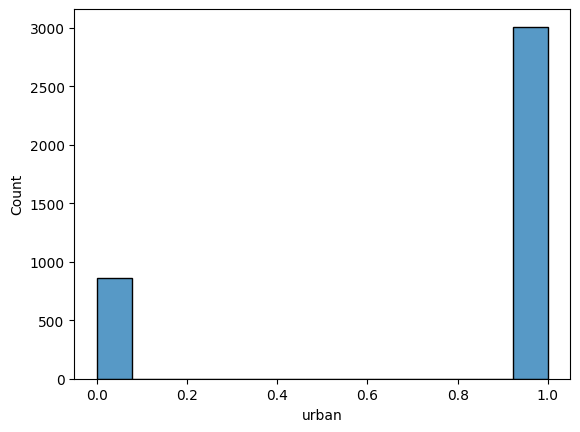

In [234]:
sns.histplot(df['urban'])

In [236]:
# Предполагаем, что разница в зп меду городом и деревней у вышников меньше, чем у остальных
high_educ = df.loc[(df['educ'] == 3)]
low_educ = df.loc[(df['educ'] < 3)]

range_high = high_educ.loc[high_educ['urban'] == 1, 'lnwage'].mean() - high_educ.loc[high_educ['urban'] == 0, 'lnwage'].mean()

range_low = low_educ.loc[low_educ['urban'] == 1, 'lnwage'].mean() - low_educ.loc[low_educ['urban'] == 0, 'lnwage'].mean()

print('high', range_high.round(2))
print('low', range_low.round(2))

high 0.28
low 0.34


mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwh

mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwh

<Axes: ylabel='Density'>

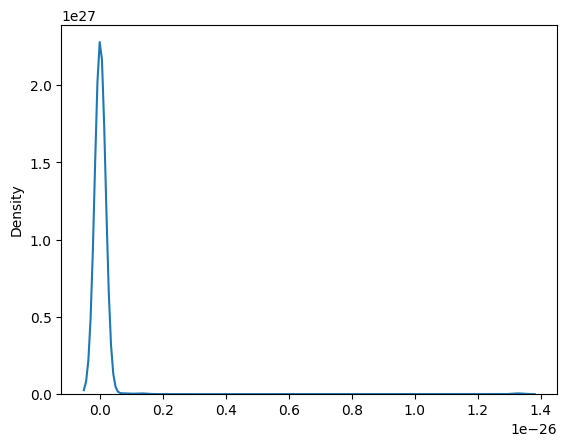

In [248]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import random


def check(g1, g2):
    if shapiro(g1)[1] >= 0.05 and shapiro(g2)[1] >= 0.05:
        print('T-test: ', end='')
        pv = ttest_ind(g1, g2, alternative='two-sided')
    else:
        print('mannwhitneyu: ', end='')
        pv = mannwhitneyu(g1, g2, alternative='two-sided')
    return pv[1]


def sample(g1, g2):
    m = min(len(g1), len(g2))
    return random.choices(g1, k=m), random.choices(g2, k=m)



e = []
a = high_educ['lnwage'].to_list()
b = low_educ['lnwage'].to_list()

for i in range(500):
    g1, g2 = sample(a, b)
    
    e.append(check(g1, g2))

sns.kdeplot(e)




In [250]:
pd.Series(e).mean()

0.2413833515470084

mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: T-test: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: T-test: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: T-test: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: T-test: mannwhitneyu: T-test: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhitneyu: mannwhit

Text(0.5, 1.0, 'Распределение P-value в строительстве по высшему образованию')

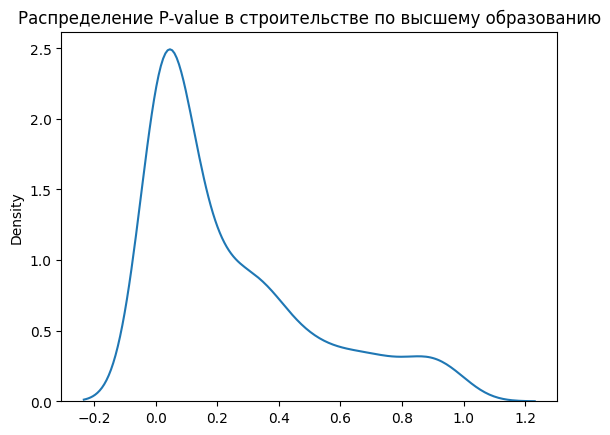

In [249]:
mas = ['ТОРГОВЛЯ, БЫ', 'ОБРАЗОВАНИЕ', 'ТРАНСПОРТ, С', 'ЗДРАВООХРАНЕ', 'СТРОИТЕЛЬСТВ', 'ЛЕГКАЯ, ПИЩЕ', 'АРМИЯ, МВД,', 'СЕЛЬСКОЕ ХОЗ', 'ЖИЛИЩНО-КОММ', 'НЕФТЕГАЗОВАЯ', 'НАУКА, КУЛЬТ', 'ОРГАНЫ УПРАВ', 'ФИНАНСЫ', 'ДРУГАЯ ОТРАС', 'ГРАЖДАНСКОЕ', 'ВОЕННО-ПРОМЫ', 'ЭНЕРГЕТИЧЕСК']
for j in range(len(mas)):
    e = []
    a = high_educ.loc[high_educ['industry'] == mas[j], 'lnwage'].to_list()
    b = low_educ.loc[low_educ['industry'] == mas[j], 'lnwage'].to_list()

    for i in range(500):
        g1, g2 = sample(a, b)
        
        e.append(check(g1, g2))
    
    print(pd.Series())



In [531]:
c.sum(axis=1).value_counts()

1    3667
0     204
Name: count, dtype: int64

# Индексы крупных отраслей

In [474]:
print(df.columns.get_loc('id64'), df.columns.get_loc('id75'))

74 85


In [532]:
d = df.iloc[:, 74:86]
d.head(5)

,id64,id65,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,1,0


In [740]:
d.sum(axis=1).value_counts()

2    1895
1    1091
4     411
0     344
3     130
Name: count, dtype: int64

Text(0.5, 1.0, 'Доля людей с высшим образованием по областям')

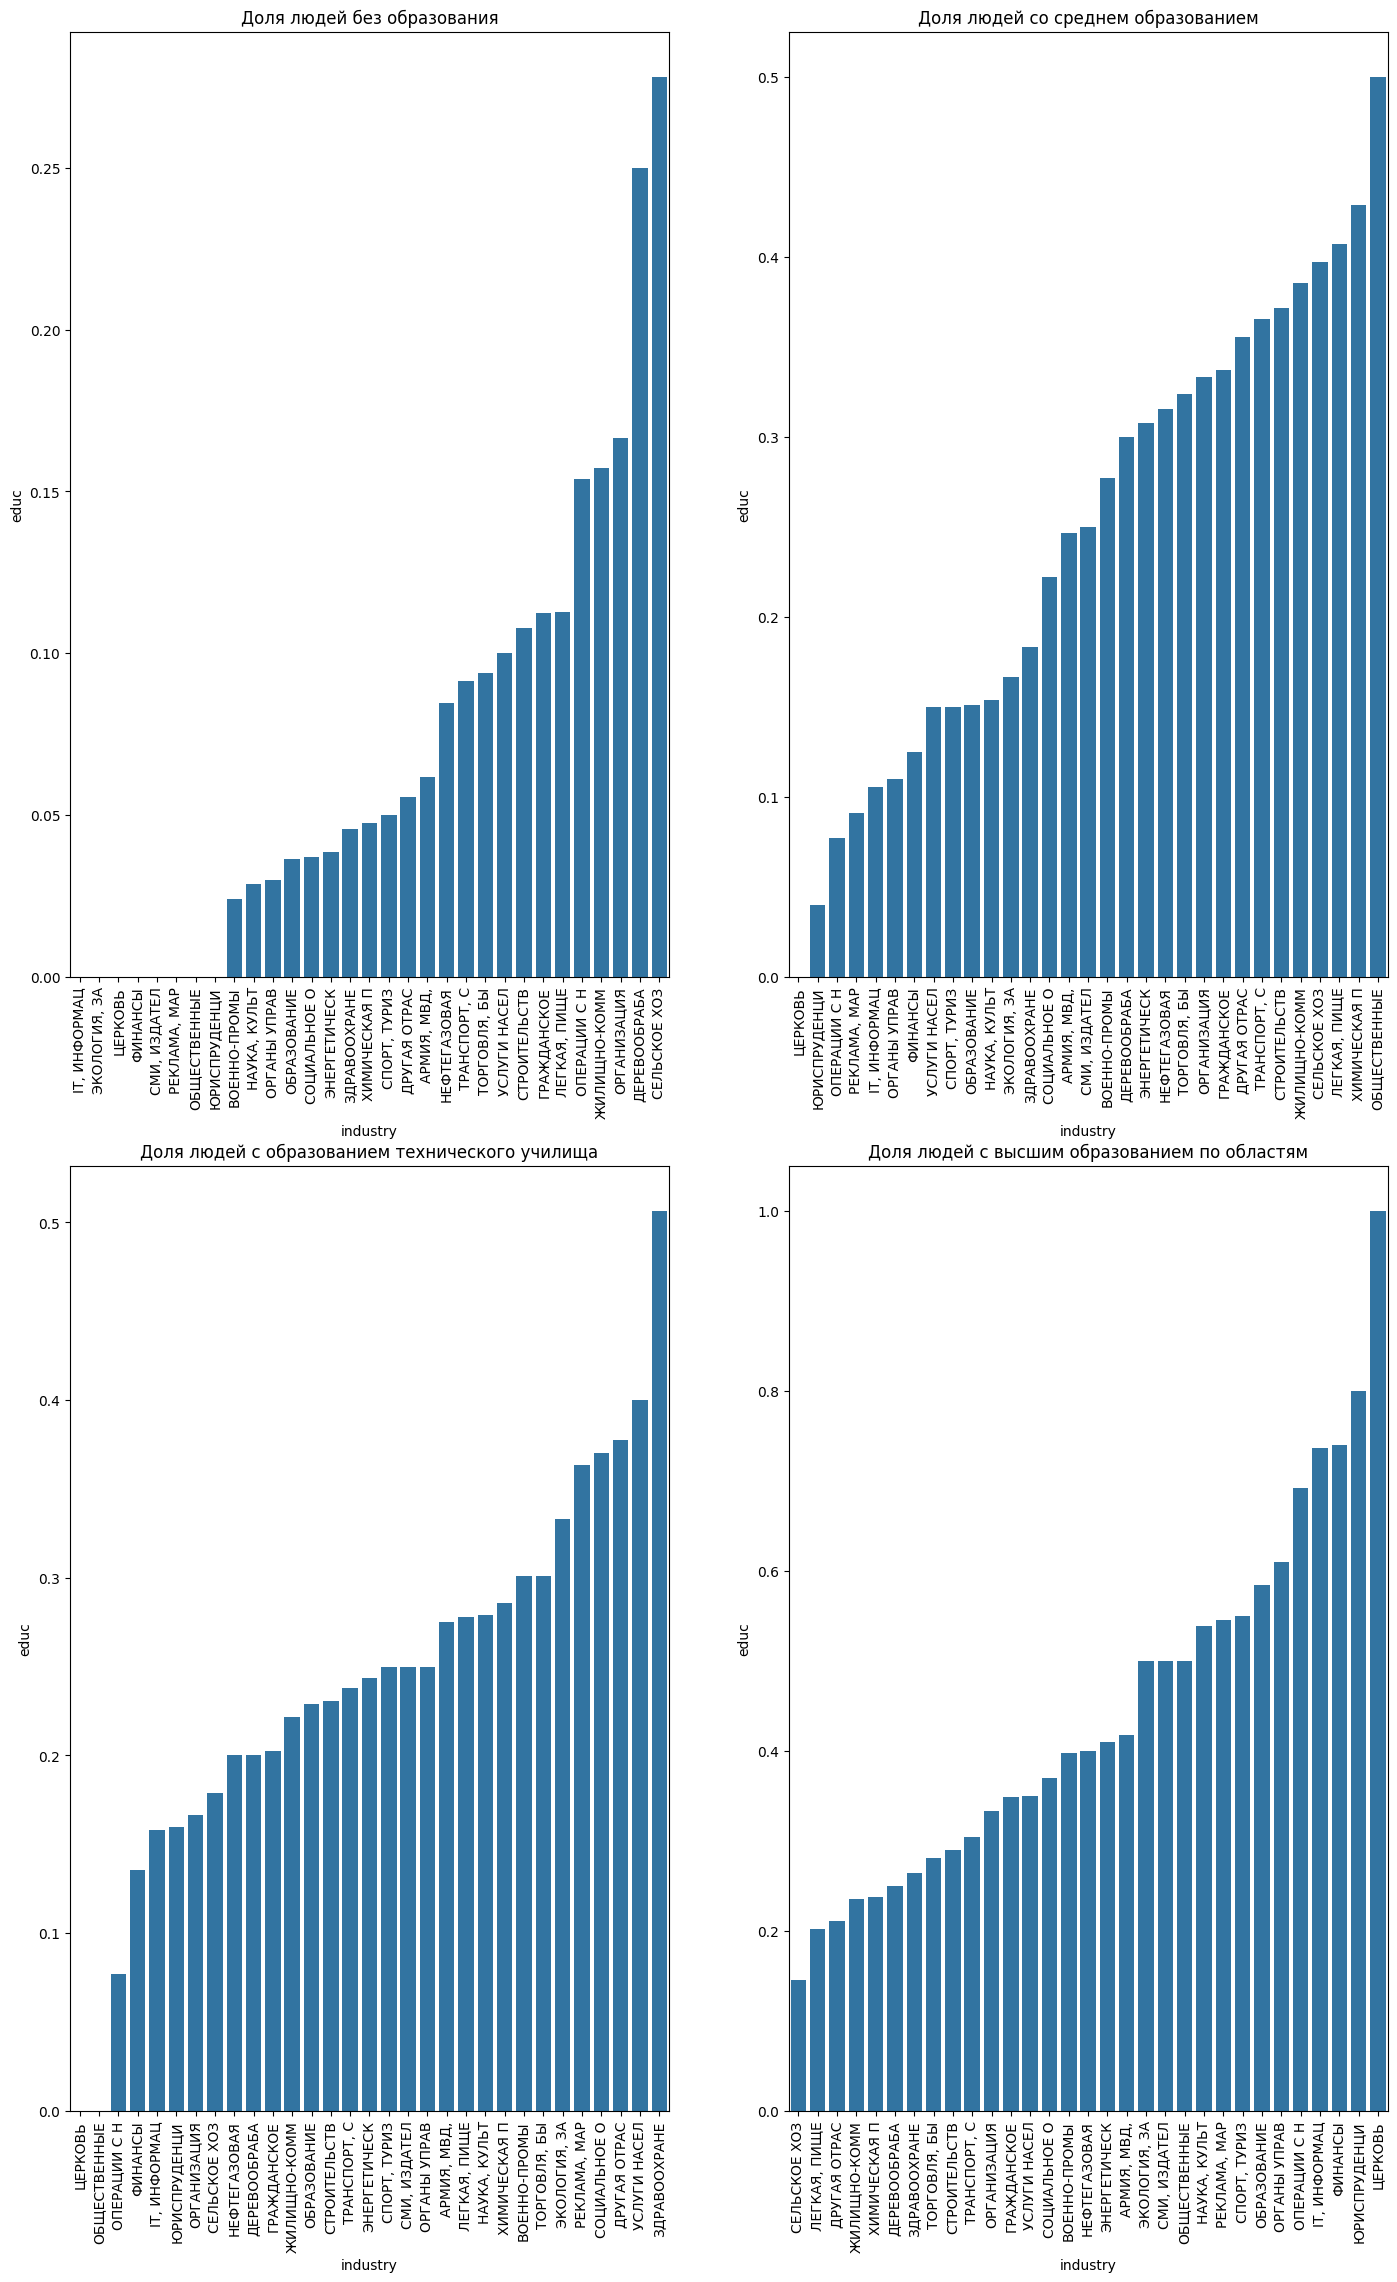

In [769]:
# Общее количество значений 3 в столбце 'educ'
total_educ = df.groupby('industry')['educ'].count()
# Группировка данных по столбцу 'industry'
grouped = df.groupby('industry')

plt.figure(figsize=(17,27))

plt.subplot(2,2,1)
# Вычисление количества значений 3 в столбце 'educ' для каждой группы
educ_0_count = grouped['educ'].apply(lambda x: (x == 0).sum())
educ_0_prop = educ_0_count / total_educ
plt.xticks(rotation=90)
sns.barplot(educ_0_prop.sort_values())
plt.title('Доля людей без образования')

plt.subplot(2,2,2)
educ_1_count = grouped['educ'].apply(lambda x: (x == 1).sum())
educ_1_prop = educ_1_count / total_educ
plt.xticks(rotation=90)
sns.barplot(educ_1_prop.sort_values())
plt.title('Доля людей со среднем образованием')


plt.subplot(2,2,3)
# Вычисление количества значений 3 в столбце 'educ' для каждой группы
educ_4_count = grouped['educ'].apply(lambda x: (x == 2).sum())
educ_4_prop = educ_4_count / total_educ
plt.xticks(rotation=90)
sns.barplot(educ_4_prop.sort_values())
plt.title('Доля людей с образованием технического училища')

plt.subplot(2,2,4)
# Вычисление количества значений 3 в столбце 'educ' для каждой группы
educ_3_count = grouped['educ'].apply(lambda x: (x == 3).sum())
educ_3_prop = educ_3_count / total_educ
plt.xticks(rotation=90)
sns.barplot(educ_3_prop.sort_values())
plt.title('Доля людей с высшим образованием по областям')



In [821]:
ar = educ_3_count / total_educ
ar = pd.DataFrame(ar)
ar
# ar.loc[ar['industry'] == 'ФИНАНСЫ']

,educ
industry,
"IT, ИНФОРМАЦ",0.736842
"АРМИЯ, МВД,",0.417062
ВОЕННО-ПРОМЫ,0.397590
ГРАЖДАНСКОЕ,0.348315
ДЕРЕВООБРАБА,0.250000
ДРУГАЯ ОТРАС,0.211111
ЖИЛИЩНО-КОММ,0.235714
ЗДРАВООХРАНЕ,0.264706
"ЛЕГКАЯ, ПИЩЕ",0.201613


In [628]:
df.loc[df['industry'] == 'СЕЛЬСКОЕ ХОЗ', 'lnwage'].sort_values()

1129     7.345542
1130     7.674046
3638     8.144049
1128     8.498221
1987     8.549514
          ...    
1530    10.446630
1298    10.564420
2351    10.564420
1443    10.669780
1958    11.411720
Name: lnwage, Length: 151, dtype: float64

In [626]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'lnwage'].sort_values()

1331     3.762023
1651     8.367193
1659     8.549514
1227     8.703665
810      8.772658
          ...    
2064    11.502690
1890    11.545250
2203    11.768390
3535    11.950710
2130    12.798010
Name: lnwage, Length: 269, dtype: float64

In [625]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'lnwage'].sort_values()

3720     8.703665
2384     8.772658
781      8.909518
1778     9.060340
324      9.060340
          ...    
3850    11.545250
1075    11.699400
1067    11.768390
1064    11.950710
1401    12.056070
Name: lnwage, Length: 130, dtype: float64

In [635]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'lnwage'].mean()

10.056632078066913

In [634]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'lnwage'].mean()

10.340600161538463

In [636]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'lnwage'].mean()

10.073159125000002

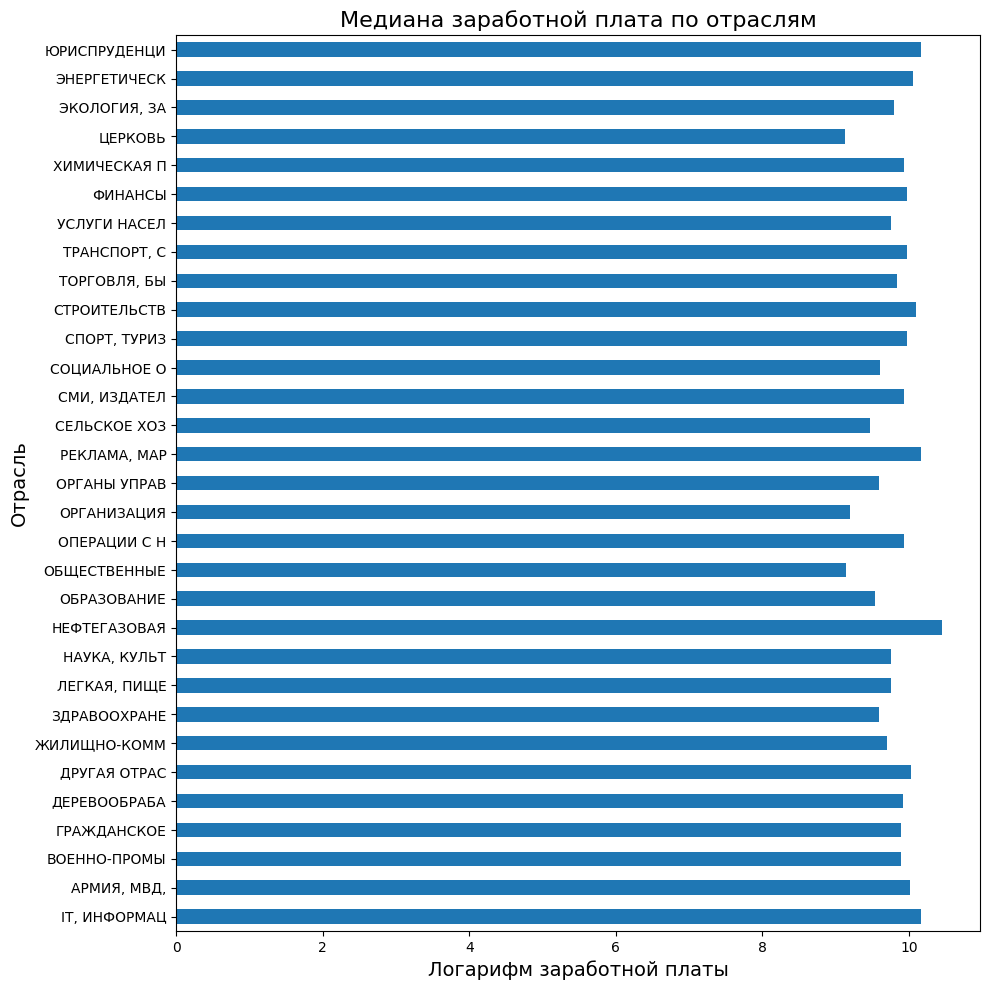

In [789]:
median_salaries = df.groupby('industry')['lnwage'].median()
# Создание рисунка и осей
fig, ax = plt.subplots(figsize=(10, 10))

# Построение горизонтальной диаграммы
median_salaries.plot(kind='barh', ax=ax)

# Настройка названия графика и меток осей
ax.set_title('Медиана заработной плата по отраслям', fontsize=16)
ax.set_xlabel('Логарифм заработной платы', fontsize=14)
ax.set_ylabel('Отрасль', fontsize=14)


# Отображение графика
plt.tight_layout()
plt.show()


In [688]:
df.sort_values('lnwage').tail(20)

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
1890,37575,Челябинск: Ч,Областной це,39,1,СТРОИТЕЛЬСТВ,11.54525,0,1,2,...,0,0,0,1,0,0,0,0,0,0
592,17140,Усинск и Уси,Город,44,1,НЕФТЕГАЗОВАЯ,11.54525,0,1,2,...,0,0,0,0,0,1,0,1,0,0
3486,53131,Казань: Респ,Областной це,28,0,"ТОРГОВЛЯ, БЫ",11.60194,0,1,1,...,0,1,0,0,0,0,0,0,0,1
877,23907,г. Москва,Областной це,58,1,ФИНАНСЫ,11.62529,0,1,1,...,0,1,0,0,0,0,0,0,0,0
1075,26830,Усинск и Уси,Город,43,0,НЕФТЕГАЗОВАЯ,11.69940,0,1,1,...,0,0,0,0,0,1,0,1,0,0
1067,26776,Усинск и Уси,Город,48,1,НЕФТЕГАЗОВАЯ,11.76839,0,1,2,...,0,0,0,0,0,1,0,1,0,0
2203,41032,Казань: Респ,Областной це,27,1,СТРОИТЕЛЬСТВ,11.76839,0,1,1,...,0,0,0,1,0,0,0,0,0,0
677,19489,г. Москва,Областной це,31,0,"ТРАНСПОРТ, С",11.76839,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2624,46061,Сыктывкар: Р,Областной це,31,0,ЮРИСПРУДЕНЦИ,11.82035,0,1,4,...,0,0,0,0,0,0,0,0,0,0
522,15743,Челябинск: Ч,Областной це,59,0,"ЛЕГКАЯ, ПИЩЕ",11.83293,0,1,2,...,0,0,0,0,0,0,1,0,0,0


In [557]:
df.loc[df['educ'].isin([0, 1, 2])]

,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,0,1,0
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,0,1
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,170,Волосовский,Село,58,0,"ТОРГОВЛЯ, БЫ",9.060340,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8,196,Волосовский,Село,39,0,СЕЛЬСКОЕ ХОЗ,9.465806,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,56976,Московская о,Село,37,1,"ЛЕГКАЯ, ПИЩЕ",10.313100,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3866,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,0,1,0,0,0,0,0,0,0,1
3867,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,0,0,0,1,0,0,0,0,0,0
3869,57005,г. Москва,Областной це,19,1,"СПОРТ, ТУРИЗ",12.461540,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [548]:
k = df.loc[df.iloc[:, 57:86].sum(axis=1) == 0]
k['lnwage']

23       9.155651
25       9.702194
29       9.060340
35       9.935810
36      10.158950
          ...    
3842     9.976630
3847     9.242662
3852    10.313100
3858    10.564420
3869    12.461540
Name: lnwage, Length: 204, dtype: float64

In [ ]:
more_one = df.loc[(df.iloc[:, 74:86].sum(axis=1).isin([2, 3, 4]))]
one = df.loc[(df.iloc[:, 74:86].sum(axis=1)) == 1]
zero = df.loc[(df.iloc[:, 74:86].sum(axis=1)) == 0]
plt.barplot([more_one['']])


,idind,status,age,male,industry,lnwage,public,internet,children,urban,...,id66,id67,id68,id69,id70,id71,id72,id73,id74,id75
0,37,ПГТ,59,1,"НАУКА, КУЛЬТ",8.95498,0,1,2,1,...,0,0,0,0,0,0,0,0,1,0
1,122,Село,40,0,ОБРАЗОВАНИЕ,10.62896,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
4,132,Село,54,0,ЗДРАВООХРАНЕ,10.15895,1,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,170,Село,58,0,"ТОРГОВЛЯ, БЫ",9.06034,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11,318,Областной це,30,1,"ТОРГОВЛЯ, БЫ",10.44663,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,56966,Областной це,33,0,"ТОРГОВЛЯ, БЫ",10.15895,0,1,1,1,...,0,1,0,0,0,0,0,0,0,1
3864,56970,Областной це,32,1,"ТОРГОВЛЯ, БЫ",10.66978,0,1,2,1,...,0,1,0,0,0,0,0,0,0,1
3865,56976,Село,37,1,"ЛЕГКАЯ, ПИЩЕ",10.31310,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3866,56979,Село,34,0,"ТОРГОВЛЯ, БЫ",10.01585,0,1,2,0,...,0,1,0,0,0,0,0,0,0,1


In [651]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'age'].describe()

count    130.000000
mean      39.538462
std        9.955057
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       58.000000
Name: age, dtype: float64

In [654]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'age'].describe()

count    269.000000
mean      39.189591
std       10.617033
min       19.000000
25%       31.000000
50%       38.000000
75%       47.000000
max       59.000000
Name: age, dtype: float64

In [653]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'age'].describe()

count    96.000000
mean     35.875000
std      10.154854
min      18.000000
25%      28.500000
50%      33.000000
75%      44.250000
max      58.000000
Name: age, dtype: float64

# Какое образование

In [828]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'educ'].value_counts()

educ
3    52
1    41
2    26
0    11
Name: count, dtype: int64

In [829]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'educ'].value_counts()

educ
1    100
3     78
2     62
0     29
Name: count, dtype: int64

In [830]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'educ'].value_counts()

educ
3    71
2    13
1    12
Name: count, dtype: int64

# Город или село

In [671]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'urban'].value_counts()

urban
1    102
0     28
Name: count, dtype: int64

In [669]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'urban'].value_counts()

urban
1    220
0     49
Name: count, dtype: int64

In [666]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'urban'].value_counts()

urban
1    84
0    12
Name: count, dtype: int64

# Сколько детей

In [678]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'children'].value_counts()

children
2    51
1    42
0    25
3    11
4     1
Name: count, dtype: int64

In [679]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'children'].value_counts()

children
1    92
2    83
0    67
3    21
4     5
5     1
Name: count, dtype: int64

In [680]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'children'].value_counts()

children
2    33
0    31
1    25
3     6
4     1
Name: count, dtype: int64

#  Пол

In [683]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'male'].value_counts()

male
1    98
0    32
Name: count, dtype: int64

In [681]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'male'].value_counts()

male
1    215
0     54
Name: count, dtype: int64

In [682]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'male'].value_counts()

male
0    70
1    26
Name: count, dtype: int64

# Государственное или частное

In [703]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'public'].value_counts()

public
0    86
1    44
Name: count, dtype: int64

In [702]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'public'].value_counts()

public
0    239
1     30
Name: count, dtype: int64

In [701]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'public'].value_counts()

public
0    50
1    46
Name: count, dtype: int64

In [867]:
df.loc[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['male'] == 0) & (df['psu'] == 'Усинск и Уси'), 'lnwage'].median()

10.56442

In [898]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'educ'].sort_values()

629     0
3810    0
168     0
3720    0
2384    0
       ..
2252    3
2253    3
686     3
2571    3
1794    3
Name: educ, Length: 130, dtype: int64

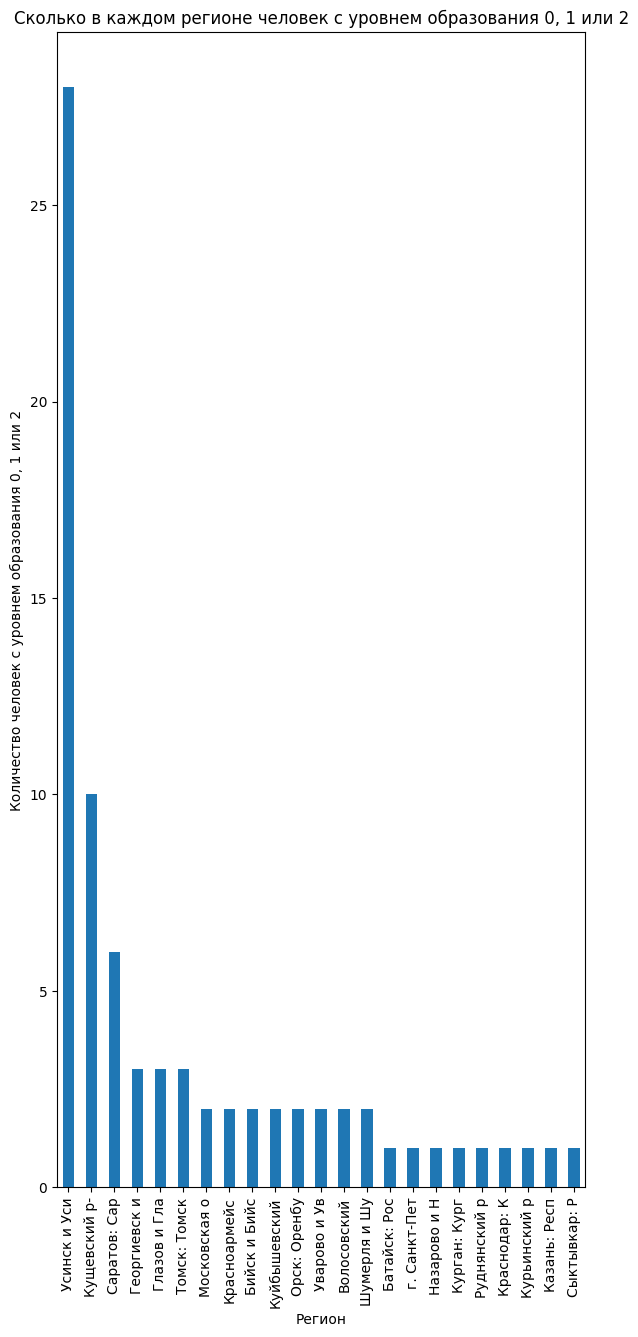

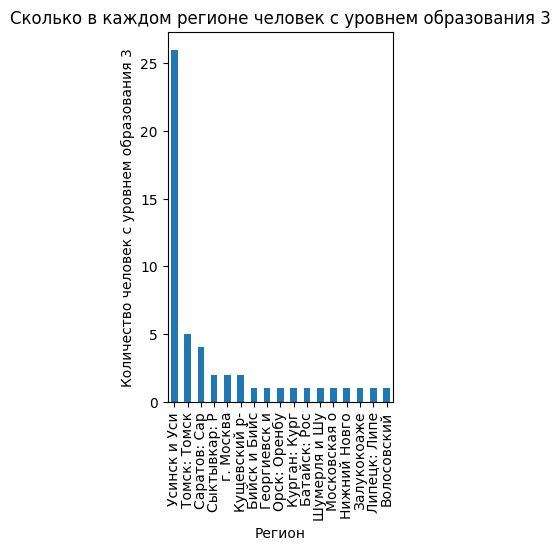

In [938]:
plt.figure(figsize=(15,15))


plt.subplot(1,2,1)
plt.title('Сколько в каждом регионе человек с уровнем образования 0, 1 или 2')
filtered_df1 = df[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'].isin([0, 1, 2]))]

filtered_df1['psu'].value_counts().plot(kind='bar')
plt.xlabel('Регион')
plt.ylabel('Количество человек с уровнем образования 0, 1 или 2')
plt.show()

plt.subplot(1,2,2)
plt.title('Сколько в каждом регионе человек с уровнем образования 3')
filtered_df2 = df[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'] == 3)]
filtered_df2['psu'].value_counts().plot(kind='bar')
plt.xlabel('Регион')
plt.ylabel('Количество человек с уровнем образования 3')
plt.show()

In [32]:
pre_set = df['industry'].value_counts().sort_values(ascending=False).reset_index(drop=False)

pre_set = pre_set.loc[(pre_set['count'] >= 60) & (pre_set['industry'] != 'ДРУГАЯ ОТРАС')]

In [34]:
['ТОРГОВЛЯ, БЫ', 'ОБРАЗОВАНИЕ', 'ТРАНСПОРТ, С', 'ЗДРАВООХРАНЕ', 'СТРОИТЕЛЬСТВ', 'ЛЕГКАЯ, ПИЩЕ', 'АРМИЯ, МВД,', 'СЕЛЬСКОЕ ХОЗ', 'ЖИЛИЩНО-КОММ', 'НЕФТЕГАЗОВАЯ', 'НАУКА, КУЛЬТ', 'ОРГАНЫ УПРАВ', 'ФИНАНСЫ', 'ДРУГАЯ ОТРАС', 'ГРАЖДАНСКОЕ', 'ВОЕННО-ПРОМЫ', 'ЭНЕРГЕТИЧЕСК']

['ТОРГОВЛЯ, БЫ',
 'ОБРАЗОВАНИЕ',
 'ТРАНСПОРТ, С',
 'ЗДРАВООХРАНЕ',
 'СТРОИТЕЛЬСТВ',
 'ЛЕГКАЯ, ПИЩЕ',
 'АРМИЯ, МВД,',
 'СЕЛЬСКОЕ ХОЗ',
 'ЖИЛИЩНО-КОММ',
 'НЕФТЕГАЗОВАЯ',
 'НАУКА, КУЛЬТ',
 'ОРГАНЫ УПРАВ',
 'ФИНАНСЫ',
 'ДРУГАЯ ОТРАС',
 'ГРАЖДАНСКОЕ',
 'ВОЕННО-ПРОМЫ',
 'ЭНЕРГЕТИЧЕСК']

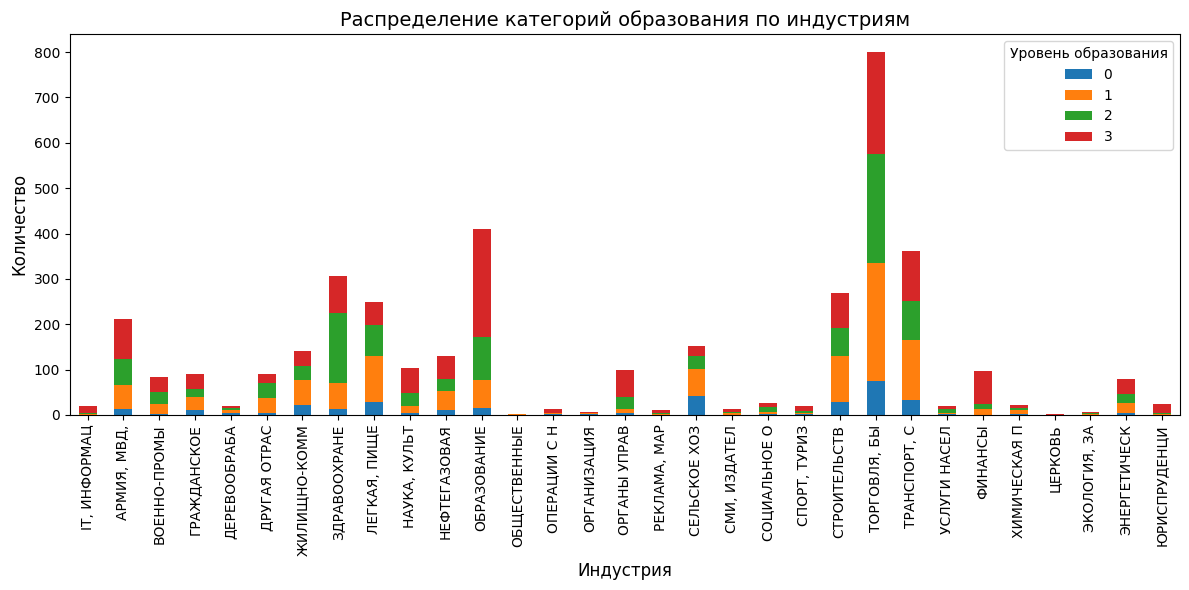

In [36]:

# Группируем данные по столбцам 'industry' и 'educ', подсчитывая количество значений
grouped = df.groupby(['industry', 'educ']).size().reset_index(name='count')

# Преобразуем столбец 'educ' в категориальный тип данных
grouped['educ'] = grouped['educ'].astype('category')

# Определяем порядок категорий в столбце 'educ'
educ_order = grouped['educ'].cat.categories

# Создаем столбчатую диаграмму с накоплением
fig, ax = plt.subplots(figsize=(10, 6))
grouped = grouped.set_index(['industry', 'educ'])['count'].unstack('educ').fillna(0)
grouped = grouped.reindex(educ_order, axis=1)
grouped.plot(kind='bar', stacked=True, ax=ax, figsize=(12, 6))

# Настраиваем внешний вид графика
ax.set_title('Распределение категорий образования по индустриям', fontsize=14)
ax.set_xlabel('Индустрия', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.legend(title='Уровень образования', labels=educ_order)

plt.tight_layout()
plt.show()


<Figure size 1000x3000 with 0 Axes>

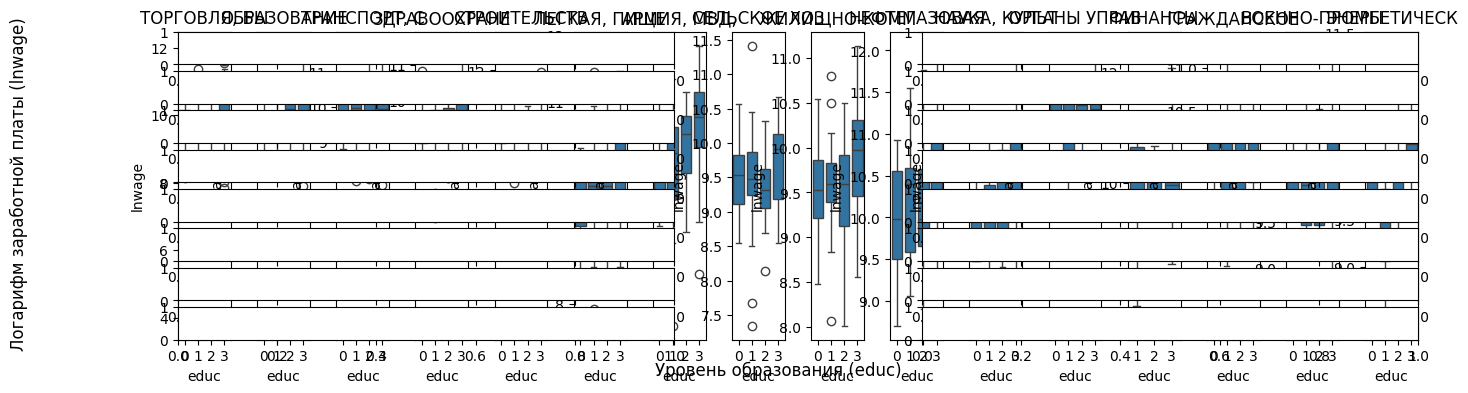

In [43]:
plt.figure(figsize=(10, 30))

# Список групп
groups = pre_set['industry']

# Создаем матрицу графиков
fig, axes = plt.subplots(nrows=1, ncols=len(groups), figsize=(16, 4))

# Итерируемся по группам и строим боксплоты
for i, group in enumerate(groups):
    group_data = df.loc[df['industry'] == group, ['educ', 'lnwage']]
    sns.boxplot(x='educ', y='lnwage', data=group_data, ax=axes[i])
    axes[i].set_title(f'{group}')
    plt.subplot(len(groups) // 2, 2, i+1)
    

# Задаем общие подписи осей
fig.supxlabel('Уровень образования (educ)', fontsize=12)
fig.supylabel('Логарифм заработной платы (lnwage)', fontsize=12)

# Регулируем отступы между графиками
plt.subplots_adjust(wspace=0.5)

plt.show()


<Figure size 1500x2500 with 0 Axes>

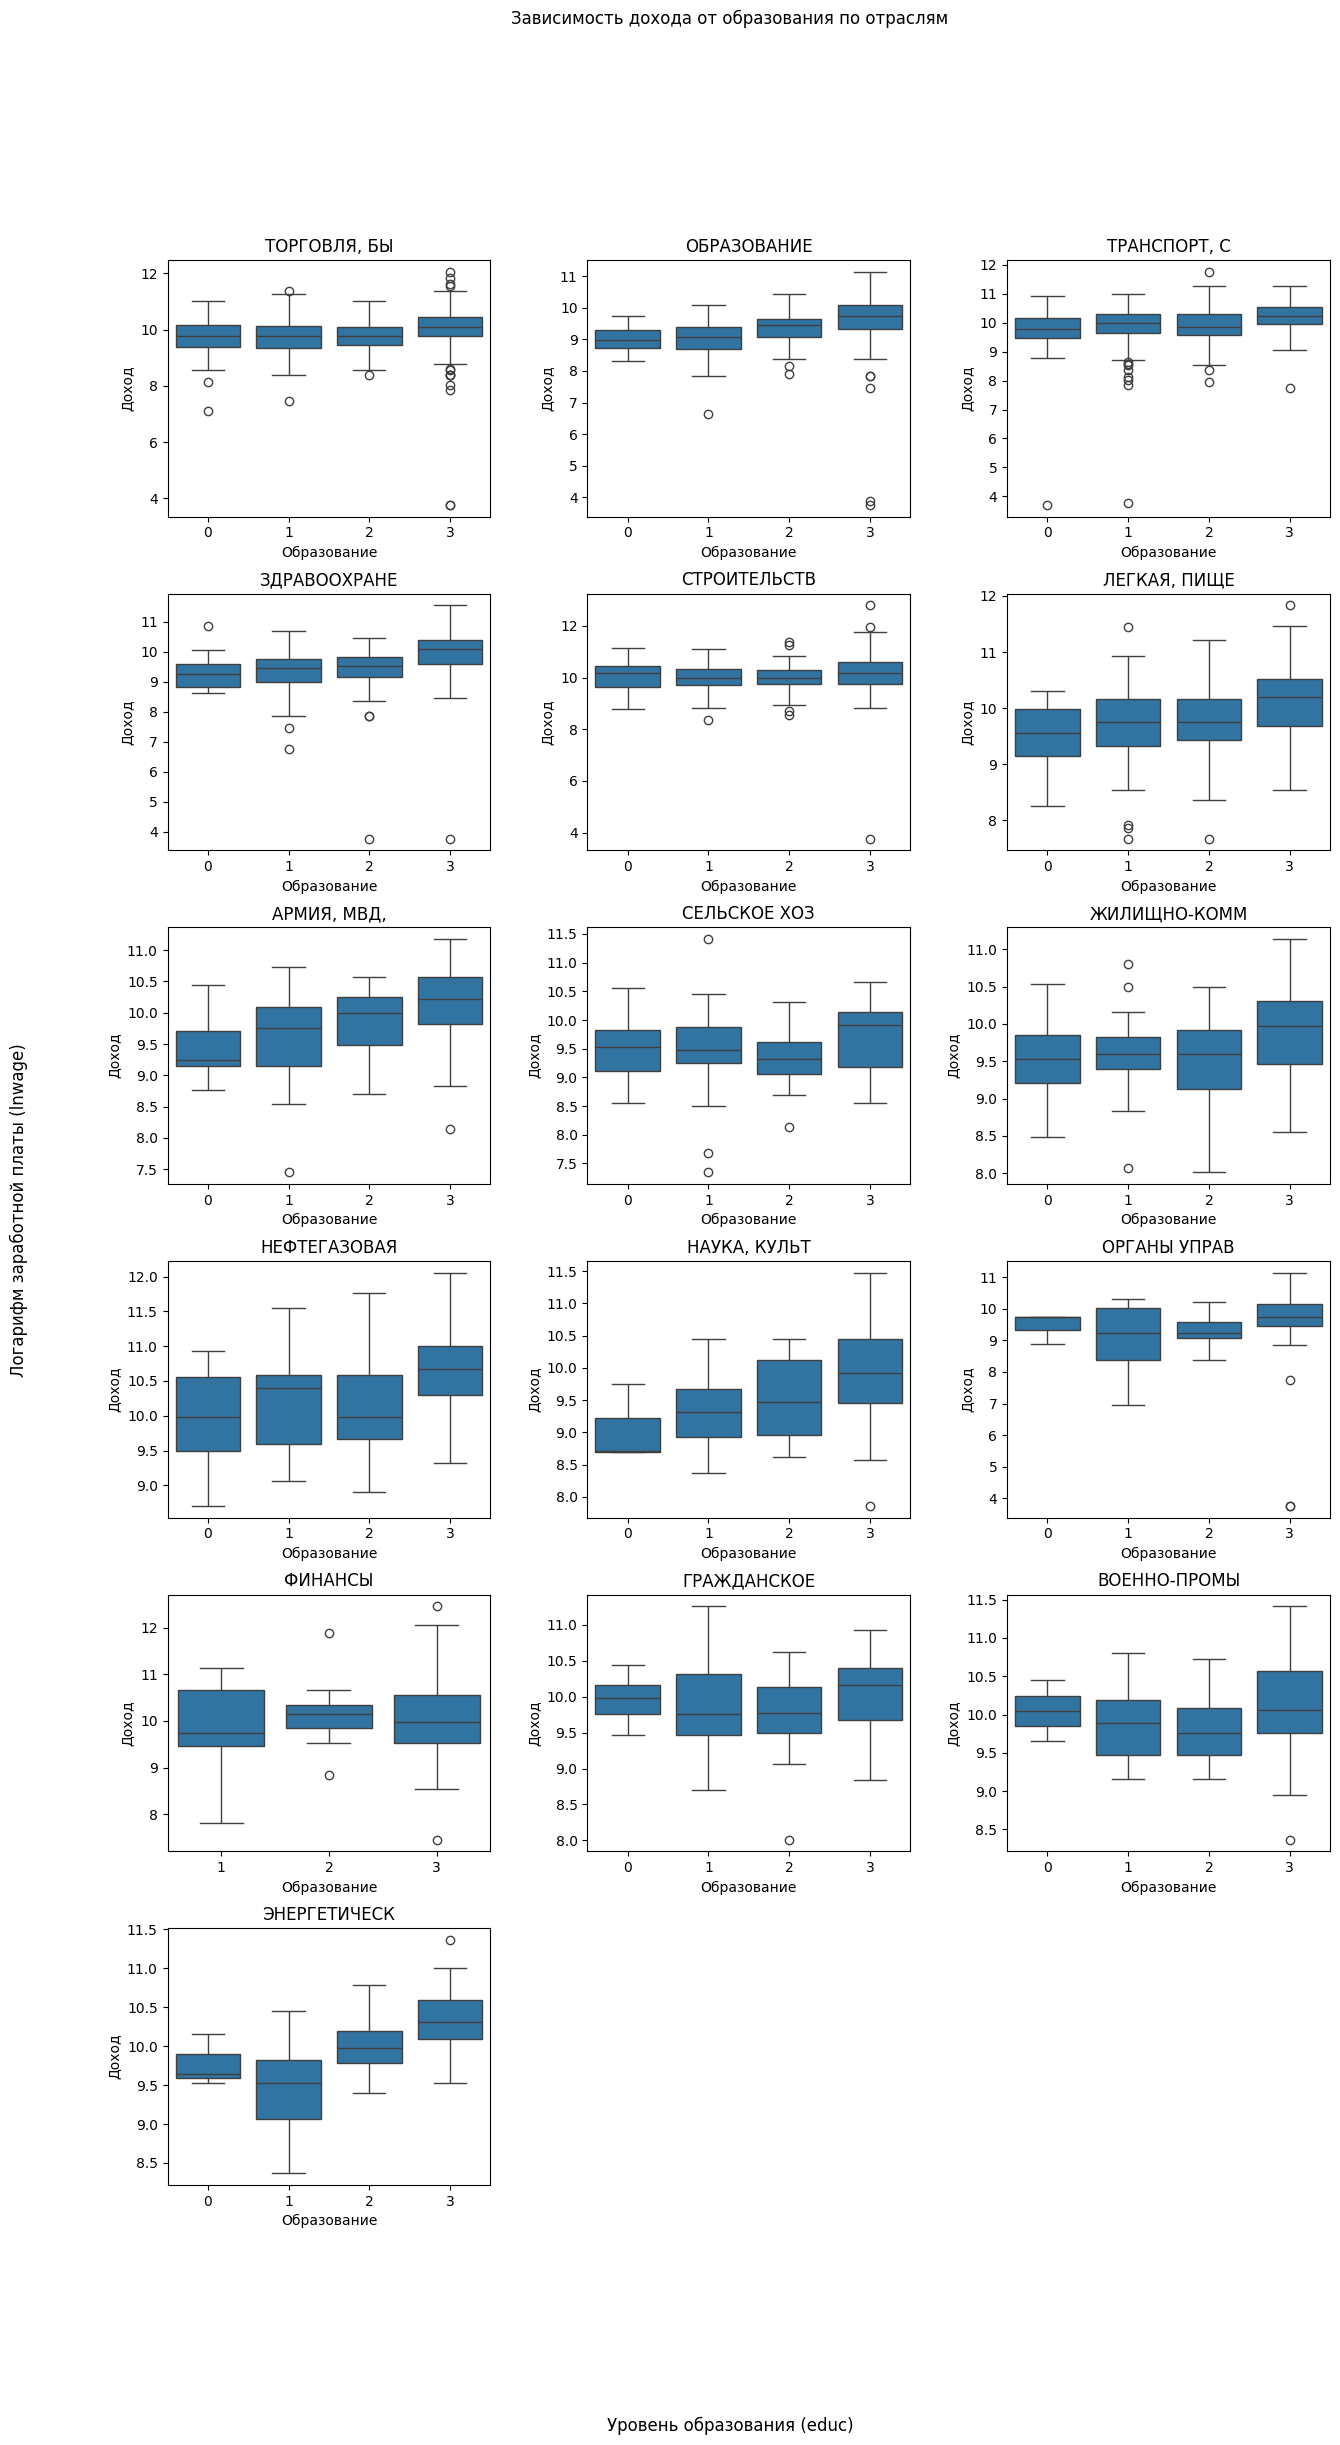

In [58]:

import math

plt.figure(figsize=(15, 25))

# Список групп
groups = pre_set['industry'].unique()

# Определяем количество строк и столбцов
num_rows = math.ceil(len(groups) / 3)
num_cols = 3

# Создаем матрицу графиков
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 25))
axes = axes.ravel()  # Преобразуем axes в плоский массив для удобства итерации
fig.suptitle('Зависимость дохода от образования по отраслям')

# Итерируемся по группам и строим боксплоты
for i, group in enumerate(groups):
    group_data = df.loc[df['industry'] == group, ['educ', 'lnwage']]
    ax = axes[i]
    sns.boxplot(x='educ', y='lnwage', data=group_data, ax=ax)
    ax.set_title(f'{group}')
    ax.set_xlabel('Образование')
    ax.set_ylabel('Доход')

# Скрываем лишние оси
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Задаем общие подписи осей
fig.supxlabel('Уровень образования (educ)', fontsize=12)
fig.supylabel('Логарифм заработной платы (lnwage)', fontsize=12)

# Регулируем отступы между графиками
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()



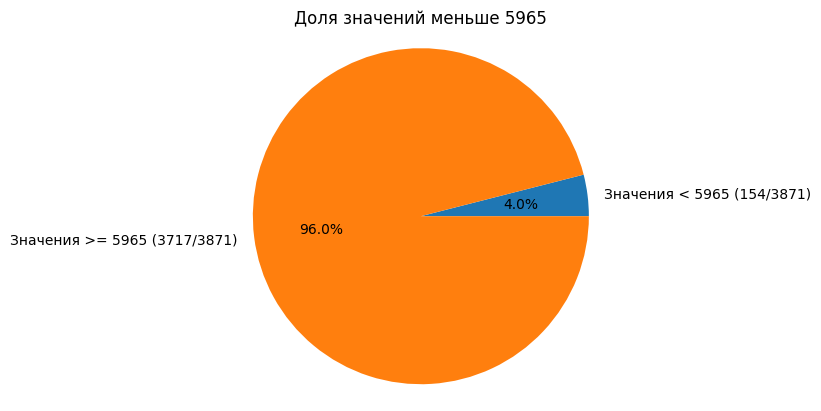

In [137]:
df['zp'] = np.exp(df['lnwage']) 
count_lt = (df['zp'] < 5965).sum()
total_count = len(df)
fraction_lt = count_lt / total_count # Скольок отбросанных
# df = df.query('zp > 5965')

fig, ax = plt.subplots()
ax.pie([fraction_lt, 1 - fraction_lt], labels=[f'Значения < 5965 ({count_lt}/{total_count})', f'Значения >= 5965 ({total_count - count_lt}/{total_count})'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Доля значений меньше 5965')
plt.show()

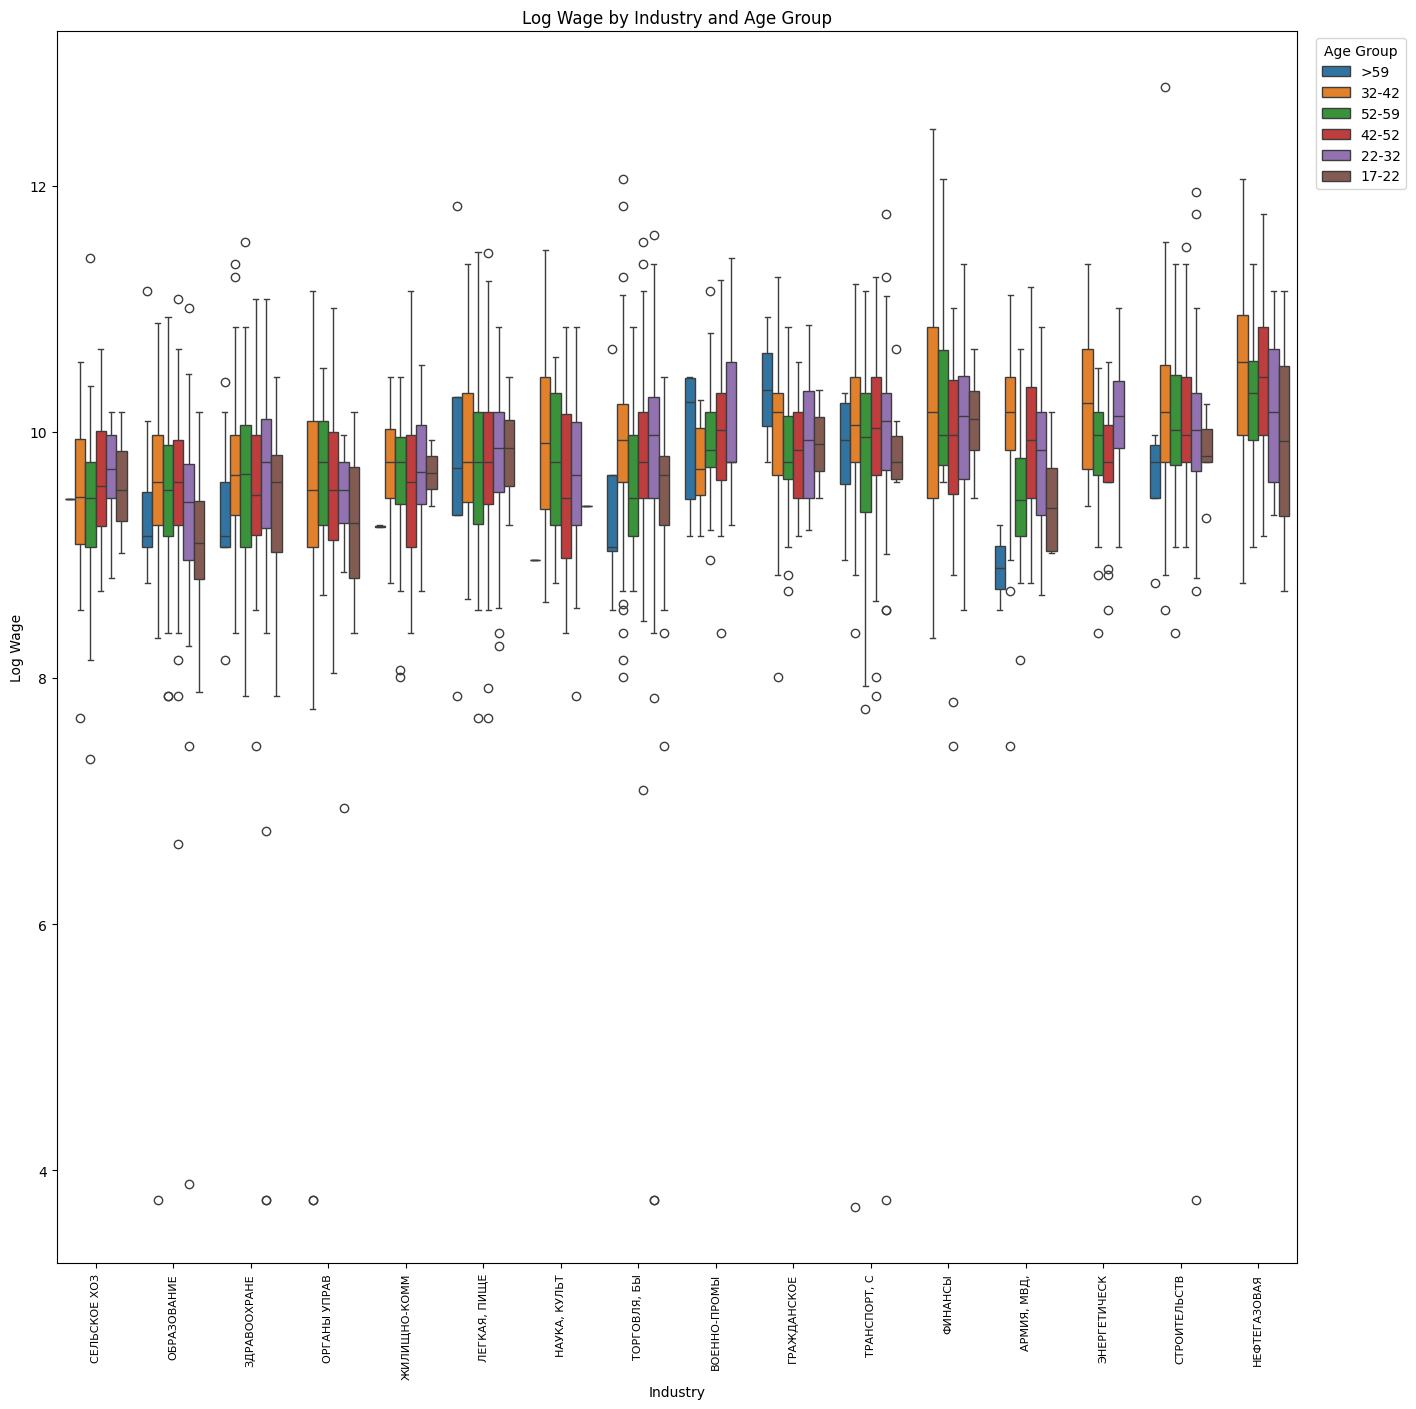

In [136]:
df['new_age'] = df['age'].apply(lambda x : '<17' if x < 17 else ('17-22' if 22 > x >= 17 else ('22-32' if 32 > x >= 22 else ('32-42' if 42 > x >= 32 else ('42-52' if 52 > x >= 42 else ('52-59' if 59 > x >= 52 else '>59'))))))

df_for_graph = df.loc[df['industry'].isin(pre_set['industry'])]

grouped = df_for_graph.loc[:,['industry', 'lnwage']] \
    .groupby(['industry']) \
    .median() \
    .sort_values(by='lnwage')


plt.figure(figsize=(16,16))
sns.boxplot(data=df_for_graph, y='lnwage', x='industry', order=grouped.index, hue='new_age')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Industry')
plt.ylabel('Log Wage')
plt.title('Log Wage by Industry and Age Group')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1.01, 1))



# Регионы проживания

In [21]:
pre_set.loc[pre_set['count'] >= 60, 'count'].sum()


3667

In [ ]:
len(df.loc[df['industry'].isin(high_group)])


In [999]:
df['industry'].unique()

array(['НАУКА, КУЛЬТ', 'ОБРАЗОВАНИЕ', 'СЕЛЬСКОЕ ХОЗ', 'ЗДРАВООХРАНЕ',
       'ЖИЛИЩНО-КОММ', 'ТОРГОВЛЯ, БЫ', 'ОРГАНЫ УПРАВ', 'ТРАНСПОРТ, С',
       'ДРУГАЯ ОТРАС', 'СМИ, ИЗДАТЕЛ', 'СОЦИАЛЬНОЕ О', 'ХИМИЧЕСКАЯ П',
       'ДЕРЕВООБРАБА', 'ЭНЕРГЕТИЧЕСК', 'СПОРТ, ТУРИЗ', 'АРМИЯ, МВД,',
       'НЕФТЕГАЗОВАЯ', 'ГРАЖДАНСКОЕ', 'ЛЕГКАЯ, ПИЩЕ', 'ВОЕННО-ПРОМЫ',
       'ЮРИСПРУДЕНЦИ', 'СТРОИТЕЛЬСТВ', 'ФИНАНСЫ', 'IT, ИНФОРМАЦ',
       'ОПЕРАЦИИ С Н', 'ОРГАНИЗАЦИЯ', 'УСЛУГИ НАСЕЛ', 'ЭКОЛОГИЯ, ЗА',
       'ОБЩЕСТВЕННЫЕ', 'ЦЕРКОВЬ', 'РЕКЛАМА, МАР'], dtype=object)

<Axes: xlabel='children', ylabel='Density'>

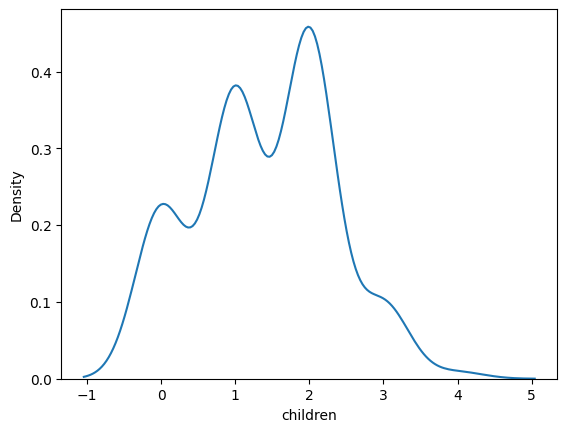

In [1000]:
sns.kdeplot(df.loc[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'] >= 0), 'children'])

<Axes: ylabel='lnwage'>

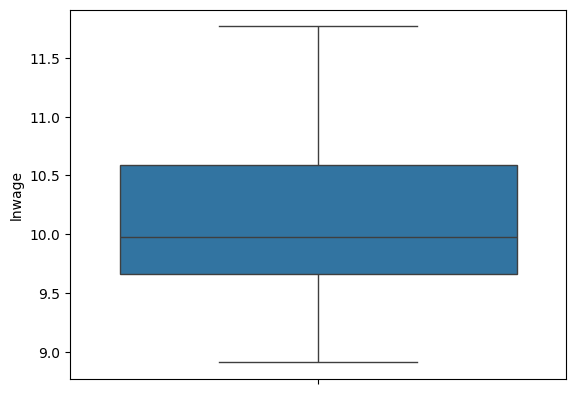

In [995]:
sns.boxplot(df.loc[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'] == 2), 'lnwage'])

<Axes: ylabel='lnwage'>

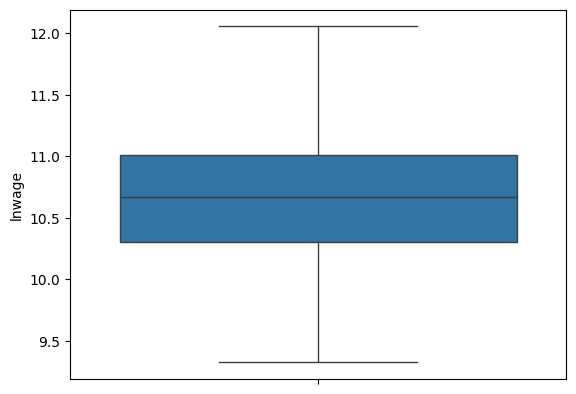

In [994]:
sns.boxplot(df.loc[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'] == 3), 'lnwage'])

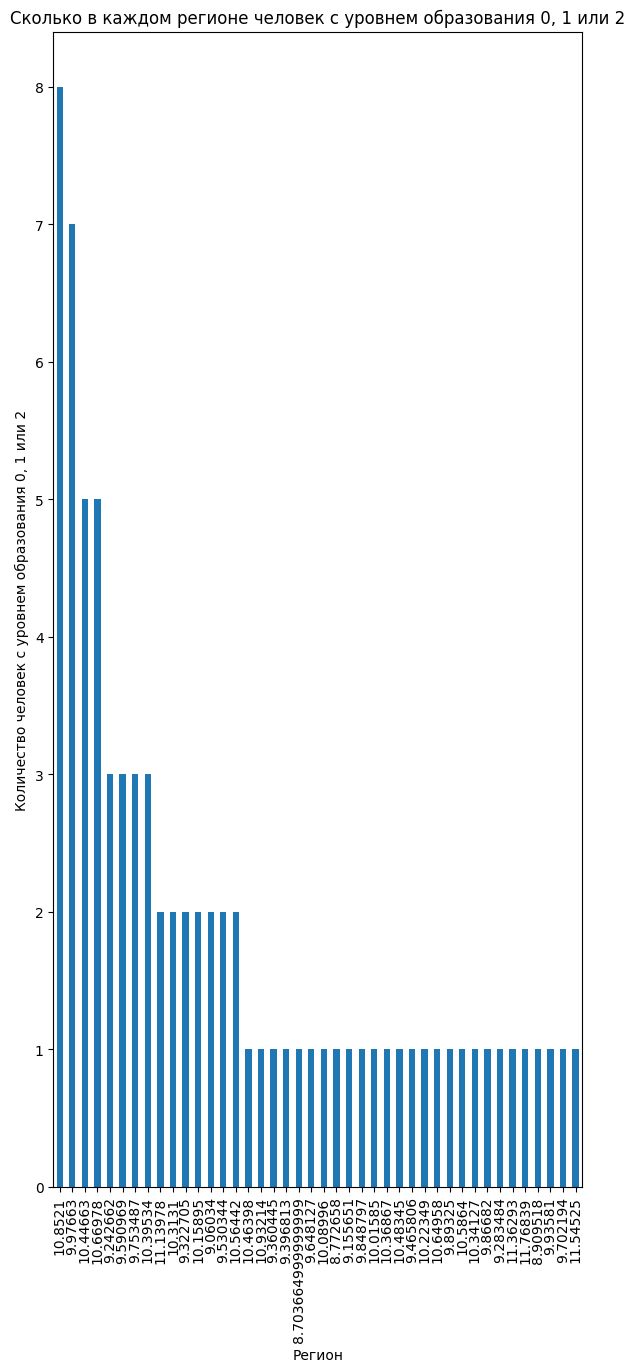

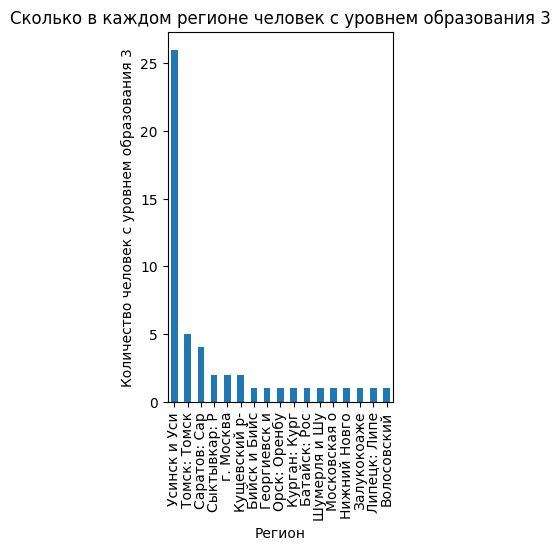

In [992]:
plt.figure(figsize=(15,15))


plt.subplot(1,2,1)
plt.title('Сколько в каждом регионе человек с уровнем образования 0, 1 или 2')
filtered_df1 = df[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'].isin([0, 1, 2]))]

filtered_df1['lnwage'].value_counts().plot(kind='bar')
plt.xlabel('Регион')
plt.ylabel('Количество человек с уровнем образования 0, 1 или 2')
plt.show()

plt.subplot(1,2,2)
plt.title('Сколько в каждом регионе человек с уровнем образования 3')
filtered_df2 = df[(df['industry'] == 'НЕФТЕГАЗОВАЯ') & (df['educ'] == 3)]
filtered_df2['psu'].value_counts().plot(kind='bar')
plt.xlabel('Регион')
plt.ylabel('Количество человек с уровнем образования 3')
plt.show()

In [937]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ'].value_counts('psu')

psu
Усинск и Уси    54
Кущевский р-    12
Саратов: Сар    10
Томск: Томск     8
Георгиевск и     4
Орск: Оренбу     3
Волосовский      3
Глазов и Гла     3
Сыктывкар: Р     3
Шумерля и Шу     3
Московская о     3
Бийск и Бийс     3
Батайск: Рос     2
Уварово и Ув     2
Курган: Кург     2
Красноармейс     2
г. Москва        2
Куйбышевский     2
Липецк: Липе     1
Руднянский р     1
Нижний Новго     1
Назарово и Н     1
Курьинский р     1
Краснодар: К     1
Казань: Респ     1
Залукокоаже      1
г. Санкт-Пет     1
Name: count, dtype: int64

In [934]:
df.loc[df['industry'] == 'НЕФТЕГАЗОВАЯ', 'psu']

69      Руднянский р
126     Шумерля и Шу
168     Саратов: Сар
169     Саратов: Сар
179     Саратов: Сар
            ...     
3740    Томск: Томск
3810    Назарово и Н
3820    Усинск и Уси
3823    Усинск и Уси
3850    Сыктывкар: Р
Name: psu, Length: 130, dtype: object

In [733]:
df.loc[df['industry'] == 'СТРОИТЕЛЬСТВ', 'psu'].value_counts()

psu
г. Москва       27
Липецк: Липе    15
Батайск: Рос    15
Сыктывкар: Р    15
Челябинск: Ч    13
Томск: Томск    10
г. Санкт-Пет     9
Московская о     9
Орск: Оренбу     8
Саратов: Сар     8
Георгиевск и     8
Казань: Респ     8
Тюменская об     8
Краснодар: К     8
Тула: Тульск     7
Курьинский р     7
Смоленск: См     7
Соликамск и      6
Кущевский р-     6
Красноярск:      6
Усинск и Уси     6
Ржев и Ржевс     5
Залукокоаже      5
Глазов и Гла     5
Шумерля и Шу     5
Уварово и Ув     5
Красноармейс     5
Куйбышевский     5
Назарово и Н     4
Владивосток:     4
Земетчинский     4
Тамбовский р     4
Волосовский      3
Вольск и Вол     3
Бийск и Бийс     2
Руднянский р     2
Курган: Кург     1
Нижний Новго     1
Name: count, dtype: int64

In [734]:
df.loc[df['industry'] == 'ФИНАНСЫ', 'psu'].value_counts()

psu
г. Москва       18
Нижний Новго     7
Тюменская об     5
Батайск: Рос     4
Московская о     4
Липецк: Липе     4
Курган: Кург     4
Владивосток:     3
г. Санкт-Пет     3
Краснодар: К     3
Саратов: Сар     3
Уварово и Ув     3
Тула: Тульск     3
Кущевский р-     2
Казань: Респ     2
Челябинск: Ч     2
Орск: Оренбу     2
Георгиевск и     2
Ржев и Ржевс     2
Красноярск:      2
Залукокоаже      2
Шумерля и Шу     2
Сыктывкар: Р     2
Томск: Томск     2
Бийск и Бийс     1
Глазов и Гла     1
Руднянский р     1
Тамбовский р     1
Курьинский р     1
Земетчинский     1
Красноармейс     1
Соликамск и      1
Усинск и Уси     1
Вольск и Вол     1
Name: count, dtype: int64

In [739]:
df.loc[df['psu'] == 'Усинск и Уси', 'industry'].value_counts()

industry
НЕФТЕГАЗОВАЯ    54
ТРАНСПОРТ, С    16
ЖИЛИЩНО-КОММ    11
ОБРАЗОВАНИЕ      8
ЗДРАВООХРАНЕ     7
СТРОИТЕЛЬСТВ     6
ТОРГОВЛЯ, БЫ     5
ОРГАНЫ УПРАВ     3
АРМИЯ, МВД,      3
ЭНЕРГЕТИЧЕСК     3
НАУКА, КУЛЬТ     3
ЮРИСПРУДЕНЦИ     2
ФИНАНСЫ          1
ДРУГАЯ ОТРАС     1
СПОРТ, ТУРИЗ     1
Name: count, dtype: int64

In [738]:
df.loc[df['psu'] == 'г. Москва', 'industry'].value_counts()

industry
ТОРГОВЛЯ, БЫ    81
ТРАНСПОРТ, С    36
СТРОИТЕЛЬСТВ    27
ОБРАЗОВАНИЕ     24
НАУКА, КУЛЬТ    23
ФИНАНСЫ         18
ЗДРАВООХРАНЕ    17
АРМИЯ, МВД,     16
ЛЕГКАЯ, ПИЩЕ    14
ЖИЛИЩНО-КОММ     9
ОРГАНЫ УПРАВ     8
ЮРИСПРУДЕНЦИ     6
СМИ, ИЗДАТЕЛ     5
ОПЕРАЦИИ С Н     4
ВОЕННО-ПРОМЫ     4
СОЦИАЛЬНОЕ О     4
СПОРТ, ТУРИЗ     3
УСЛУГИ НАСЕЛ     3
РЕКЛАМА, МАР     3
ЭНЕРГЕТИЧЕСК     3
IT, ИНФОРМАЦ     2
НЕФТЕГАЗОВАЯ     2
ГРАЖДАНСКОЕ      1
ОБЩЕСТВЕННЫЕ     1
ХИМИЧЕСКАЯ П     1
Name: count, dtype: int64

In [973]:
df.loc[(df['id64']) == 1, 'industry'].value_counts()

industry
СТРОИТЕЛЬСТВ    269
ЛЕГКАЯ, ПИЩЕ    248
НЕФТЕГАЗОВАЯ    130
ЭНЕРГЕТИЧЕСК     78
Name: count, dtype: int64

In [976]:
df.loc[(df['id67']) == 1, 'industry'].value_counts()

industry
ТОРГОВЛЯ, БЫ    800
ФИНАНСЫ          96
Name: count, dtype: int64

In [978]:
df.loc[(df['id69']) == 1, 'industry'].value_counts()

industry
ТРАНСПОРТ, С    361
СТРОИТЕЛЬСТВ    269
Name: count, dtype: int64

In [979]:
df.loc[(df['id70']) == 1, 'industry'].value_counts()

industry
ОБРАЗОВАНИЕ     411
ОРГАНЫ УПРАВ    100
Name: count, dtype: int64

In [980]:
df.loc[(df['id71']) == 1, 'industry'].value_counts()

industry
НЕФТЕГАЗОВАЯ    130
ДРУГАЯ ОТРАС     90
Name: count, dtype: int64

In [981]:
df.loc[(df['id72']) == 1, 'industry'].value_counts()

industry
ЛЕГКАЯ, ПИЩЕ    248
ГРАЖДАНСКОЕ      89
Name: count, dtype: int64

In [982]:
df.loc[(df['id73']) == 1, 'industry'].value_counts()

industry
НЕФТЕГАЗОВАЯ    130
ДРУГАЯ ОТРАС     90
ЭНЕРГЕТИЧЕСК     78
Name: count, dtype: int64

In [983]:
df.loc[(df['id74']) == 1, 'industry'].value_counts()

industry
ОБРАЗОВАНИЕ     411
ЗДРАВООХРАНЕ    306
НАУКА, КУЛЬТ    104
Name: count, dtype: int64

In [985]:
df.loc[(df['id75']) == 1, 'industry'].value_counts()

industry
ТОРГОВЛЯ, БЫ    800
СЕЛЬСКОЕ ХОЗ    151
Name: count, dtype: int64

In [991]:
df.loc[df['industry'] == 'ОРГАНЫ УПРАВ', 'age']

age
52    7
39    6
33    6
57    6
54    5
45    4
56    4
49    4
41    4
44    4
32    3
46    3
37    3
36    3
55    3
38    3
26    3
53    3
35    2
40    2
43    2
29    2
30    2
50    2
47    2
23    2
34    2
24    1
20    1
27    1
51    1
58    1
28    1
25    1
19    1
Name: count, dtype: int64

# Жоказательство гипотез

----------------------------------------------------------------------------------------------------


In [479]:
inter = df['lnwage'].quantile(.75) - df['lnwage'].quantile(.25) 
new_df1 = df.loc[(df['lnwage'] > df['lnwage'].quantile(.25) - 3*inter) & (df['lnwage'] < df['lnwage'].quantile(.75) + inter*3)]
new_df1.head(5)

,idind,status,age,male,industry,lnwage,public,internet,children,urban,...,id69,id70,id71,id72,id73,id74,id75,id,hugeid,exp_to_pow
0,37,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,1,...,0,0,0,0,0,1,0,id6,id41,7746.372901
1,122,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,0,...,0,1,0,0,0,1,0,id6,id41,41314.136148
2,125,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,0,...,0,0,0,0,0,0,1,id6,id41,30985.356472
3,126,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,0,...,0,0,0,0,0,0,1,id6,id41,17214.150017
4,132,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,0,...,0,0,0,0,0,1,0,id6,id41,25821.170592


,idind,psu,status,age,male,industry,lnwage,public,internet,children,...,id67,id68,id69,id70,id71,id72,id73,id74,id75,main_ind
0,37,Волосовский,ПГТ,59,1,"НАУКА, КУЛЬТ",8.954980,0,1,2,...,0,0,0,0,0,0,0,1,0,Строительство и транспорт
1,122,Волосовский,Село,40,0,ОБРАЗОВАНИЕ,10.628960,1,1,1,...,0,0,0,1,0,0,0,1,0,ВПК и армия
2,125,Волосовский,Село,53,0,СЕЛЬСКОЕ ХОЗ,10.341270,0,1,3,...,0,0,0,0,0,0,0,0,1,Образование и здравоохранение
3,126,Волосовский,Село,47,1,СЕЛЬСКОЕ ХОЗ,9.753487,0,0,1,...,0,0,0,0,0,0,0,0,1,Образование и здравоохранение
4,132,Волосовский,Село,54,0,ЗДРАВООХРАНЕ,10.158950,1,1,1,...,0,0,0,0,0,0,0,1,0,Органы управления и образование
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,56966,г. Санкт-Пет,Областной це,33,0,"ТОРГОВЛЯ, БЫ",10.158950,0,1,1,...,1,0,0,0,0,0,0,0,1,"Легкая, пищевая и гражданская промышленность"
3864,56970,г. Санкт-Пет,Областной це,32,1,"ТОРГОВЛЯ, БЫ",10.669780,0,1,2,...,1,0,0,0,0,0,0,0,1,"Легкая, пищевая и гражданская промышленность"
3866,56979,Московская о,Село,34,0,"ТОРГОВЛЯ, БЫ",10.015850,0,1,2,...,1,0,0,0,0,0,0,0,1,"Легкая, пищевая и гражданская промышленность"
3867,56982,Московская о,Село,39,1,"ТРАНСПОРТ, С",11.139780,1,1,2,...,0,0,1,0,0,0,0,0,0,Образование и наука


In [8]:
data = df
data = data.iloc[:,63:75]

def find_id(l):
    out=[]
    l = list(l)
    for i in range(len(l)):
        if l[i] ==1:
           out.append(i)
    if len(out)>0:
        return out[0]
data['ind'] = data.apply(find_id, axis=1)
data['ind'] = data['ind'].fillna(12)

proms = {0:'Промышленность', 1:'Образование и наука', 2:'Образование и здравоохранение', 3:'Торговля и финансы', 4:'ВПК и армия', 5:'Строительство и транспорт', 6:'Органы управления и образование', 7:'Нефтегазовая и другие добывающие', 8:'Легкая, пищевая и гражданская промышленность', 9:'Нефтегазовая, другие добывающие и энергетическая', 10:'Образование, наука и здравоохранение', 11:'Сельское хозяйство и торговля ', 12:'bezdelnik'}

data['main_ind'] = data.apply(lambda x: proms[x['ind']], axis=1)
data_new = data.iloc[:,-1]
df = pd.concat([df, data_new], axis=1)